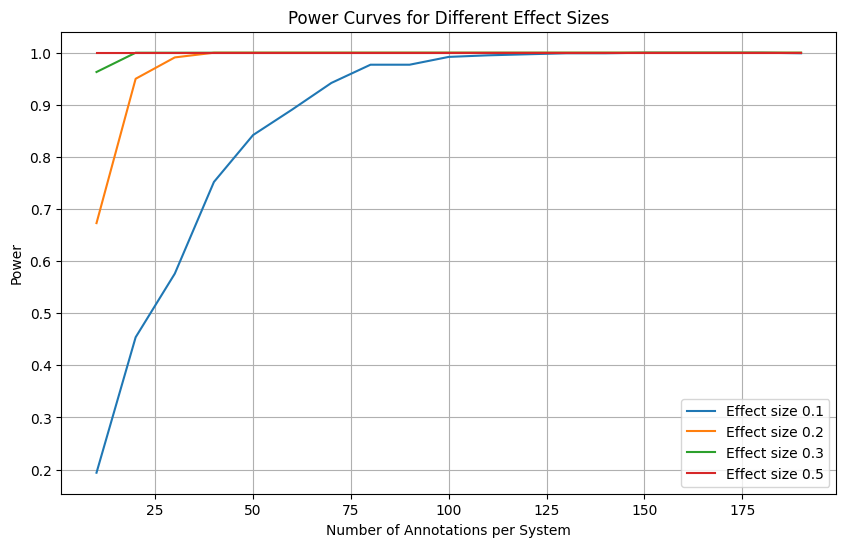

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kruskal, mannwhitneyu
from statsmodels.stats.power import tt_ind_solve_power

# Function to simulate data with given effect size
def simulate_data(n, effect_size, groups=3):
    # Base data - random scores from a uniform distribution
    data = np.random.rand(n, groups)
    # Adjust data by adding an effect size to simulate differences
    for i in range(groups):
        data[:, i] += i * effect_size
    return data

# Function to calculate power for a given sample size and effect size
def calculate_power(n, effect_size, alpha=0.05, iterations=1000):
    powers = []
    for _ in range(iterations):
        data = simulate_data(n, effect_size)
        # Apply Kruskal-Wallis test
        k_stat, p_value = kruskal(data[:, 0], data[:, 1], data[:, 2])
        powers.append(p_value < alpha)
    return np.mean(powers)

# Range of sample sizes and effect sizes
sample_sizes = range(10, 200, 10)
effect_sizes = [0.1, 0.2, 0.3, 0.5]
power_curves = {es: [calculate_power(n, es) for n in sample_sizes] for es in effect_sizes}

# Plotting the results
plt.figure(figsize=(10, 6))
for es, powers in power_curves.items():
    plt.plot(sample_sizes, powers, label=f'Effect size {es}')

plt.title('Power Analysis for Different Effect Sizes')
plt.xlabel('Number of Annotations per System')
plt.ylabel('Power')
plt.legend()
plt.grid(True)
plt.show()


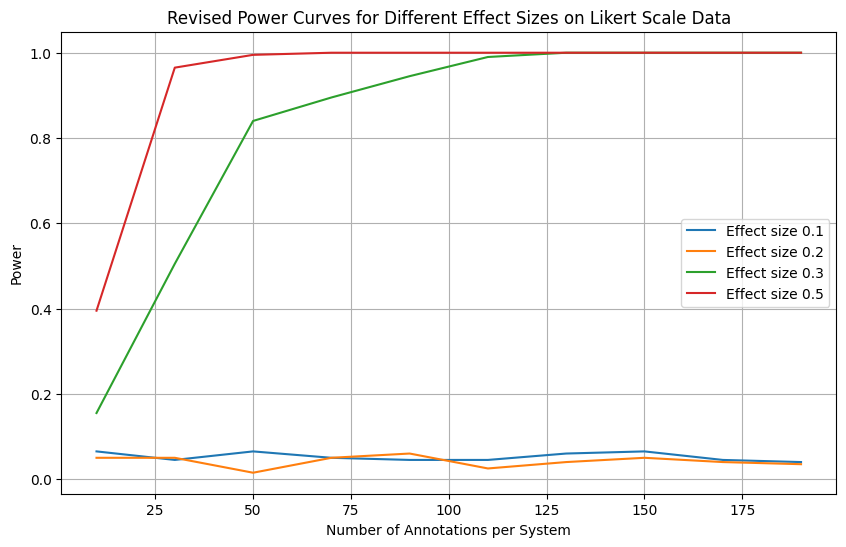

In [ ]:
# Revised function to simulate Likert scale data with more realistic variability
def simulate_likert_data_revised(n, effect_size, groups=3):
    # Generate random data according to the CDF [0.1, 0.3, 1]
    random_data = np.random.rand(n, groups)
    # Apply CDF to transform uniform data to follow the specified distribution
    data = np.select(
        [random_data <= 0.1, random_data <= 0.3, random_data <= 1],
        [1, 2, 3]
    )
    # Introduce effect by slightly shifting the median rating between groups
    for i in range(groups):
        shift = int(i * effect_size * 2)  # Adjust shift to be within reasonable limits for a Likert scale
        data[:, i] = np.clip(data[:, i] + shift, 1, 3)
    return data

# Function to calculate power for revised Likert scale data
def calculate_power_likert_revised(n, effect_size, alpha=0.05, iterations=200):  # Further reduced iterations for speed
    powers = []
    for _ in range(iterations):
        data = simulate_likert_data_revised(n, effect_size)
        # Apply Kruskal-Wallis test, ensuring variability in groups
        if len(set(data.flatten())) > 1:  # Check if all values are not identical
            k_stat, p_value = kruskal(data[:, 0], data[:, 1], data[:, 2])
            powers.append(p_value < alpha)
        else:
            powers.append(False)  # If no variability, assume no power to detect differences
    return np.mean(powers)

sample_sizes_adjusted = range(10, 200, 20)  # Larger steps

# Simulate power calculation for revised approach and adjusted range
power_curves_likert_revised = {es: [calculate_power_likert_revised(n, es) for n in sample_sizes_adjusted] for es in effect_sizes}

# Plotting the revised results for Likert scale data
plt.figure(figsize=(10, 6))
for es, powers in power_curves_likert_revised.items():
    plt.plot(sample_sizes_adjusted, powers, label=f'Effect size {es}')

plt.title('Revised Power Curves for Different Effect Sizes on Likert Scale Data')
plt.xlabel('Number of Annotations per System')
plt.ylabel('Power')
plt.legend()
plt.grid(True)
plt.show()
